In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import altair as alt

In [3]:
def load_scripts():
    df1 = pd.read_csv('../data/simpsons_script_lines.csv', error_bad_lines=False)\
        .sort_values(['episode_id', 'timestamp_in_ms'])\
        .reset_index()
    
    df2 = pd.read_csv('../data/simpsons_episodes.csv', error_bad_lines=False)[['id', 'season']]
    df2.columns = ['episode_id', 'season']

    df3 = pd.merge(df1, df2, how='left', on='episode_id')
    
    return df3


def get_matrix(df, n_characters):
    
    # get top characters by line count
    cts = df.raw_character_text.value_counts()
    top = list(cts[:n_characters].index)
    
    # create new dataframe
    d = {'x1' : df.copy().raw_character_text[:-1].values,
         'x2' : df.copy().raw_character_text[1:].values}
    df1 = pd.DataFrame.from_dict(d)

    # filter out characters talking to themselves
    df2 = df1[np.where(df1.x1 != df1.x2, True, False)]
    
    df3 = pd.get_dummies(df2.x2).groupby(df2.x1).apply(sum)
    df3.columns = list(df3.index)
    df3.index = list(df3.index)

    df4 = df3.loc[top,top]

    return df4

In [4]:
# %%time
# read in data
df = load_scripts()

# get matrix
# N = len(set(df.raw_character_text))
# N = 300
# character_matrix = get_matrix(df, N)

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

In [5]:
df1 = df.groupby('raw_character_text')\
    .count()[['id']]\
    .reset_index()\
    .sort_values('id', ascending=False)\
    .reset_index(drop=True)

df2 = df.groupby('raw_character_text')\
    .sum()[['word_count']]\
    .reset_index()\
    .sort_values('word_count', ascending=False)\
    .reset_index(drop=True)

df3 = pd.merge(df1, df2, how='left', on='raw_character_text').iloc[:15,:]

In [6]:
print(df3.shape)
df3.head()

(15, 3)


,raw_character_text,id,word_count
0,Homer Simpson,29839,271208.0
1,Marge Simpson,14157,124710.0
2,Bart Simpson,13776,109113.0
3,Lisa Simpson,11500,99224.0
4,C. Montgomery Burns,3172,36212.0


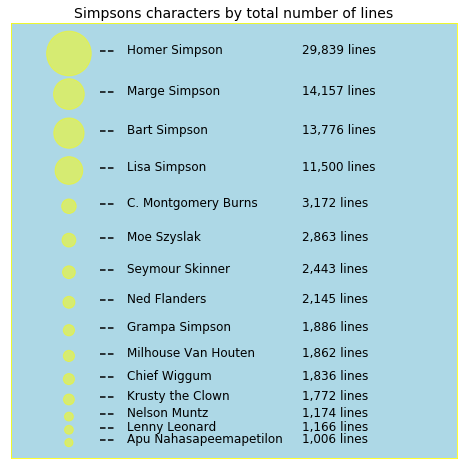

In [8]:
df4 = df3.copy()
df4.loc[:,'x'] = [0]*df3.shape[0]
df4.loc[:,'y'] = df3.index[::-1]**1.51
df4.loc[df4.shape[0]-1,'y'] = df4.loc[df4.shape[0]-1,'y'] - .8
s = df3.id/15
df4

plt.rcParams["figure.figsize"] = [8,8]
ax = df4.plot.scatter(x='x', y='y', alpha=0.5, s=s, c='yellow')
for i, txt in enumerate(df4.raw_character_text):
    plt.hlines(y = df4.y.iat[i]+.3, xmin=16, xmax=23, linestyle='--', color='black')
    n_lines = df3.id.iat[i]
    txt_full = f'{txt}:'
    ax.annotate(txt, (30, df4.y.iat[i]), color='black', size = 12)
    ax.annotate(f'{n_lines:,.0f} lines', (120, df4.y.iat[i]), color='black', size = 12)
plt.xlim([-30,200])
plt.ylim([-3,58])
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
ax.set_facecolor('lightblue')
for pos in ['top', 'bottom', 'right', 'left']:
        ax.spines[pos].set_edgecolor('yellow')
plt.title('Simpsons characters by total number of lines', fontsize=14)
plt.savefig('../plots/bubbles.png', bbox_inches='tight')
plt.show()
